In [31]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, roc_auc_score,
                             roc_curve, classification_report, auc, precision_recall_fscore_support, balanced_accuracy_score)
from sklearn.model_selection import train_test_split
import time
from sklearn.preprocessing import StandardScaler
import random
import seaborn as sns
from matplotlib import rcParams
from catboost import CatBoostClassifier


In [86]:
file_path = '/content/drive/MyDrive/Alldata/Train_data_New_Labeled.csv'
df = pd.read_csv(file_path)

df.head()

,batch_label,A0A075B6H7,A0A075B6J9,A0A0B4J1X5,A0A0C4DH36,A0A0C4DH43,A0A0C4DH67,A0A2R8Y4L2,A1A5D9,A6NI72,...,G1VH46_9BACT,E4ZDX7_NEIL0,E7RXF0_9BURK,G5G9G6_9BACT,A0A1H9N1D3_9LACT,PSD_NEIMB,F4EZW1_SELS3,F9DG16_9BACT,Unnamed: 5330,label
0,A1_11,98975700,2098021,61841200,4169000,7953570,0,2138280,0.0,0,...,0,2771727,0.0,0.0,0,0,0.0,0.0,NaN,0
1,A1_12,70159520,2795550,68706800,2076218,8723430,618985,2796730,0.0,0,...,0,17886300,0.0,0.0,0,0,1997213.0,0.0,NaN,1
2,A1_13,108736600,4982160,103378900,6393000,11587240,1822855,3839750,206095.8,0,...,1323880,4530410,0.0,7862640.0,0,0,0.0,0.0,NaN,1
3,A1_14,18277720,609439,16986710,0,0,0,0,0.0,0,...,3047630,60345600,0.0,4309540.0,0,0,0.0,0.0,NaN,0
4,A1_1,0,1834376,46157000,3804630,8513950,0,6766640,0.0,0,...,0,7693080,0.0,0.0,0,0,729930.0,0.0,NaN,0


In [87]:
df.shape

(240, 5332)

In [88]:
# dropping the batch_label column
columns_to_drop = [col for col in df.columns if col == 'batch_label' or col == 'Unnamed: 5330']
df = df.drop(columns=columns_to_drop)
df.shape

(240, 5330)

In [89]:
df.head()

,A0A075B6H7,A0A075B6J9,A0A0B4J1X5,A0A0C4DH36,A0A0C4DH43,A0A0C4DH67,A0A2R8Y4L2,A1A5D9,A6NI72,A8K2U0,...,A0A069ZK09_9PORP,G1VH46_9BACT,E4ZDX7_NEIL0,E7RXF0_9BURK,G5G9G6_9BACT,A0A1H9N1D3_9LACT,PSD_NEIMB,F4EZW1_SELS3,F9DG16_9BACT,label
0,98975700,2098021,61841200,4169000,7953570,0,2138280,0.0,0,46531100,...,0,0,2771727,0.0,0.0,0,0,0.0,0.0,0
1,70159520,2795550,68706800,2076218,8723430,618985,2796730,0.0,0,84710800,...,0,0,17886300,0.0,0.0,0,0,1997213.0,0.0,1
2,108736600,4982160,103378900,6393000,11587240,1822855,3839750,206095.8,0,94359600,...,0,1323880,4530410,0.0,7862640.0,0,0,0.0,0.0,1
3,18277720,609439,16986710,0,0,0,0,0.0,0,23196300,...,0,3047630,60345600,0.0,4309540.0,0,0,0.0,0.0,0
4,0,1834376,46157000,3804630,8513950,0,6766640,0.0,0,94153200,...,0,0,7693080,0.0,0.0,0,0,729930.0,0.0,0


CatBoost Model

Test Accuracy: 0.8542

Classification Report:
              precision    recall  f1-score   support

    Negative       0.81      0.92      0.86        24
    Positive       0.90      0.79      0.84        24

    accuracy                           0.85        48
   macro avg       0.86      0.85      0.85        48
weighted avg       0.86      0.85      0.85        48


Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative                  22                   2
Actual Positive                   5                  19


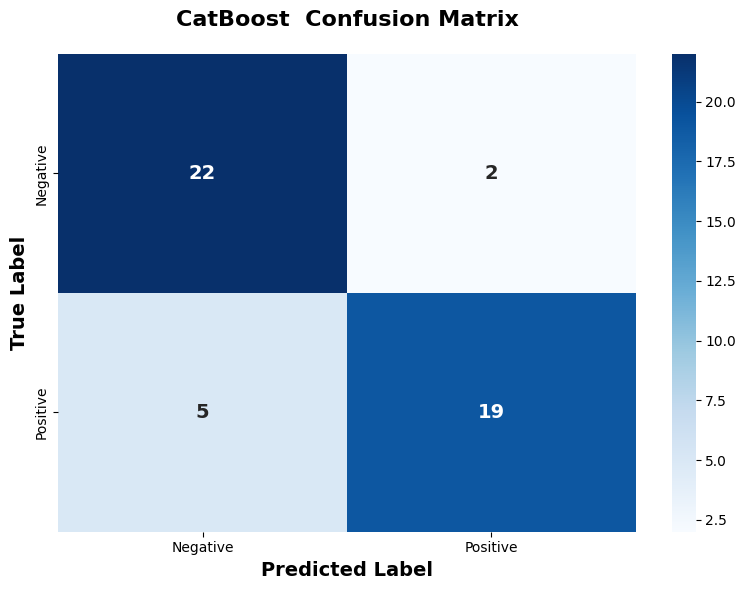

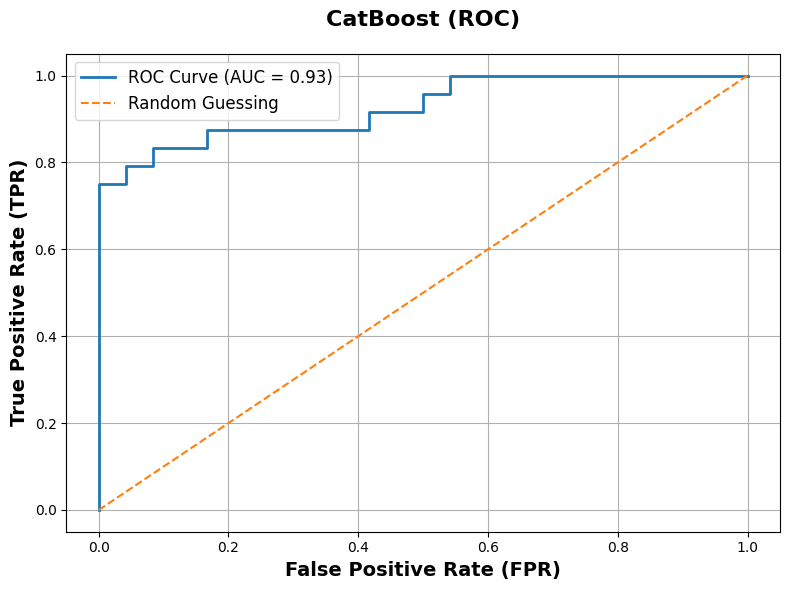


Per-Class Metrics:
Negative Class -> Precision: 0.8148, Recall: 0.9167, F1: 0.8627, Accuracy (Specificity): 0.9167
Positive Class -> Precision: 0.9048, Recall: 0.7917, F1: 0.8444, Accuracy (Sensitivity): 0.7917


In [90]:
# Settings
plt.rcParams['font.family'] = 'sans-serif'
np.random.seed(42)

# Prepare data

X = df.drop(columns=['label']).values  # Features
y = df['label'].values  # Target variable

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Standardize features

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


# Initialize & Train CatBoost

catboost_classifier = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    loss_function='Logloss',
    eval_metric='Accuracy',
    verbose=0,
    random_seed=42
)
catboost_classifier.fit(X_train, y_train)


# Predict

y_predictCAT = catboost_classifier.predict(X_test)

if y_predictCAT.ndim > 1:
    y_predictCAT = y_predictCAT.ravel()
y_probs = catboost_classifier.predict_proba(X_test)[:, 1]  # Probabilities for positive class


# Overall Metrics

test_accuracy = accuracy_score(y_test, y_predictCAT)
print(f"Test Accuracy: {test_accuracy:.4f}")

print('\nClassification Report:')
print(classification_report(
    y_test, y_predictCAT,
    target_names=['Negative', 'Positive'],
    zero_division=0
))

# Confusion Matrix

conf_matrix = confusion_matrix(y_test, y_predictCAT, labels=[0, 1])
conf_df = pd.DataFrame(
    conf_matrix,
    columns=['Predicted Negative', 'Predicted Positive'],
    index=['Actual Negative', 'Actual Positive']
)
print('\nConfusion Matrix:')
print(conf_df)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'],
            annot_kws={'size': 14, 'weight': 'bold'})
plt.title('CatBoost  Confusion Matrix', pad=20, fontsize=16, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=14, fontweight='bold')
plt.ylabel('True Label', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


# ROC Curve & AUC

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, lw=2, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate (FPR)', fontsize=14, fontweight='bold')
plt.ylabel('True Positive Rate (TPR)', fontsize=14, fontweight='bold')
plt.title('CatBoost (ROC)', pad=20, fontsize=16, fontweight='bold')
plt.legend(prop={'size': 12})
plt.grid(True)
plt.tight_layout()
plt.show()


# Per-Class Metrics (Precision / Recall / F1 / Accuracy)
# -----------------------------
# Precision, Recall, F1 per class (order: class 0 -> Negative, class 1 -> Positive)
precision_per_class = precision_score(y_test, y_predictCAT, average=None, labels=[0, 1], zero_division=0)
recall_per_class = recall_score(y_test, y_predictCAT, average=None, labels=[0, 1], zero_division=0)
f1_per_class = f1_score(y_test, y_predictCAT, average=None, labels=[0, 1], zero_division=0)

# Accuracy per class:
# Negative class accuracy = Specificity = TN / (TN + FP)
# Positive class accuracy = Sensitivity = TP / (TP + FN)
tn, fp, fn, tp = conf_matrix.ravel()
acc_negative = tn / (tn + fp) if (tn + fp) > 0 else 0.0
acc_positive = tp / (tp + fn) if (tp + fn) > 0 else 0.0

print("\nPer-Class Metrics:")
print(f"Negative Class -> Precision: {precision_per_class[0]:.4f}, Recall: {recall_per_class[0]:.4f}, "
      f"F1: {f1_per_class[0]:.4f}, Accuracy (Specificity): {acc_negative:.4f}")
print(f"Positive Class -> Precision: {precision_per_class[1]:.4f}, Recall: {recall_per_class[1]:.4f}, "
      f"F1: {f1_per_class[1]:.4f}, Accuracy (Sensitivity): {acc_positive:.4f}")

